# DS 1.1 Playground: _Gun Violence_

***

## DS Process - Modified Step #1: `Get Data`

### Import Statements and Initializations

In [1]:
import numpy as np                 # NumPy: Numerical Python -- Direct Operations on Numerical Data
import pandas as pd                # Data Manipulation Library -- High-Power, High-Computation
import seaborn as sns              # Basic Data Visualization Library -- Beautiful but Inflexible
import matplotlib.pyplot as plt    # Adv. Data Visualization Library -- Flexible but Complex
import scipy.stats as stats        # Statistical Analysis Package -- Advanced Data Analysis
import glob
pd.options.display.max_colwidth = 5000

In [2]:
PATH = "./gun-violence-data_01-2013_03-2018.csv"

df = pd.read_csv(PATH)

Pandas is _automatically hiding_ some columns for displaying/rendering purposes. Be sure to explore **ALL** of our data!

## DS Process - Modified Step #2: `Ask Question(s)`

### Looking at Data Features (Columns)

In [3]:
features = df.columns
features

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

**ASSERTION**: `n_killed` and `n_injured` are powerful _target features_ for basic data questioning.

### OVERARCHING QUESTIONS:

* What significance does the political affiliation (D/R) of the current president have on a given year's overall gun violence?

  - (EXTERNAL DATA MANIPULATION) Needs new column mapping political affiliation of current president per year. 


* What significance does the political affiliation (D/R) of a given state have on the state's overall gun violence?

  - (EXTERNAL DATA MANIPULATION) Needs new column mapping political affiliation of state governor per state per year. 

### BASIC DATA QUESTIONS:

* What is the relationship between `participant_gender` and `n_killed`/`n_injured` across our data?
* What is the relationship between `participant_age_group` and `n_killed`/`n_injured` across our data?
* What is the relationship between `state` and `n_killed`/`n_injured` across our data?
* What is `mean` of deaths; meaning if a gun violence were to happen the likelyhood of there being a death.
* Which `gun_type` is more common per case?

## DS Process - Step #3: `Explore Data`

### First Look at Our Data

In [4]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/||http://www.wtae.com/news/local/allegheny/U-S-Marshals-task-force-arrests-New-Year-s-party-shooting-suspect/17977588||http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://losangeles.cbslocal.com/2013/01/01/man-killed-3-wounded-at-nye-party-in-hawthorne/||http://latimesblogs.latimes.com/lanow/2013/01/hawthorne-new-year-party-three-killed.html||https://usgunviolence.wordpress.com/2013/01/01/killed-man-hawthorne-ca/||http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Seagers||3::Ladd Tate Sr||4::Tallis Moore,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, Arrested||2::Killed||3::Injured||4::Injured",0::Subject-Suspect||1::Subject-Suspect||2::Victim||3::Victim||4::Victim,http://www.morningjournal.com/general-news/20130222/lorain-man-pleads-innocent-to-new-years-murder||http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-shootout-killer-was-frenetic-talented-neighbor-says,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||2::Anthony Ticali||3::Sonny Archuleta,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Suspect,http://denver.cbslocal.com/2013/01/06/officer-told-neighbor-standoff-gunman-was-on-meth-binge/||http://www.westword.com/news/sonny-archuleta-triple-murder-in-aurora-guns-purchased-legally-55-57-5900504||http://www.denverpost.com/ci_22322380/aurora-shooter-was-frenetic-talented-neighbor-says||http://www.dailymail.co.uk/news/article-2258008/Sonny-Archuleta-Gunman-left-dead-latest-Aurora-shooting-lost-brother-gun-violence.html||http://www.dailydemocrat.com/20130106/aurora-shootout-killer-was-frenetic-talented-neighbor-says,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d4c723e8-5a0f-11e2-a1fa-0019bb30f31a.html,False,...,0::18||1:

### IMMEDIATE ASSERTIONS:

- `incident_id` is irrelevant for our current data investigation(s).
- `incident_url` is irrelevant for our current data investigation(s).
- `source_url` is irrelevant for our current data investigation(s).
- `incident_url_fields_missing` is irrelevant for our current data investigation(s).
- `latitude` is irrelevant for our current data investigation(s).
- `longitude` is irrelevant for our current data investigation(s).
- `sources` is irrelevant for our current data investigation(s).
***
- `congressional_district` is unnecessary for now but could hold valuable information later.
- `state_house_district` is unnecessary for now but could hold valuable information later.
- `state_senate_district` is unnecessary for now but could hold valuable information later.
- `notes` is unnecessary for now but could hold valuable information later.
- `address` is unnecessary for now but could hold valuable information later.
- `location_description` is unnecessary for now but could hold valuable information later.

For our current project, we'll treat all as invaluable and drop them from our dataset.

### NOTE: _Run only once to drop relevant data._

In [5]:
def feature_dropper(df, features_to_drop):
    for feature in features_to_drop:
        if feature in df.columns:
            df.drop(columns=[feature], inplace=True)
    return

In [6]:
FEATURES_TO_DROP = ['incident_id', 
                    'incident_url', 
                    'source_url', 
                    'incident_url_fields_missing', 
                    'latitude',
                    'longitude',
                    'sources',
                    'congressional_district',
                    'state_house_district',
                    'state_senate_district',
                    'notes',
                    'address',
                    'location_description']

In [7]:
feature_dropper(df, FEATURES_TO_DROP)

In [8]:
len(df.columns)

# Raw data should have 29 columns/features.
# Cleaned data should have 29 - len(FEATURES_TO_DROP) columns/features.

16

### NOTE: Replace state full name with their respective abbreviation

In [9]:
fullname_states = sorted(df["state"].unique())

In [10]:
abbre_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',  'DC', 'FL', 'GA',
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
          
          
state_mapper = dict(zip(fullname_states, abbre_states))
state_mapper

df["state"] = df["state"].map(state_mapper)
df["state"].unique()
# def change_state_fullname_to_abbreviation(df=df, state):
#     """This functions changes state fullnames into their respective abbreviation"""
#     for state in df[state]:
        
#     return 

array(['PA', 'CA', 'OH', 'CO', 'NC', 'OK', 'NM', 'LA', 'MD', 'TN', 'MO',
       'DC', 'IL', 'DE', 'UT', 'MI', 'GA', 'IN', 'MS', 'NY', 'FL', 'WA',
       'SC', 'AZ', 'KY', 'NJ', 'VA', 'WI', 'RI', 'TX', 'AL', 'KS', 'CT',
       'WV', 'MN', 'NV', 'NE', 'MA', 'HI', 'NH', 'IA', 'AK', 'AR', 'ID',
       'OR', 'WY', 'ME', 'ND', 'MT', 'VT', 'SD'], dtype=object)

### NOTE: `participant_type` does not seem to map perfectly to other participant-related features. Must explore further.

In [11]:
df.tail(3)

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
239674,2018-03-31,LA,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,1.0,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim
239675,2018-03-31,TX,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim
239676,2018-03-31,ME,Norridgewock,2,0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Domestic Violence",2.0,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect


In [12]:
df["year"] = df["date"].apply(lambda x: int(x.split("-")[0]))
df["month"] = df["date"].apply(lambda x: int(x.split("-")[1]))
df["day"] = df["date"].apply(lambda x: int(x.split("-")[2]))
# df.drop(columns=["date"], inplace=True)
df.tail(3)

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
239674,2018-03-31,LA,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,1.0,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,2018,3,31
239675,2018-03-31,TX,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,2018,3,31
239676,2018-03-31,ME,Norridgewock,2,0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Domestic Violence",2.0,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,2018,3,31


## Before we dive into `context-specific cleaning`, let's perform some `general cleaning`.

In [13]:
def show_unique_values_per_feature(feature, df=df):
    """ Displays all unique values within a single feature in your dataset. """
    return df[feature].unique().tolist()

In [14]:
def show_unique_types_per_feature(feature, df=df):
    """ Displays all unique datatypes within a single feature in your dataset. """
    types = set()
    for value in df[feature]:
        types.update([type(value)])
    return list(types)

### Testing Unique Value/Type Printer Function

In [15]:
current_feature = "n_killed"

In [16]:
show_unique_values_per_feature(current_feature)

[0, 1, 4, 2, 5, 3, 6, 7, 11, 8, 9, 10, 16, 50, 27, 17]

In [17]:
show_unique_types_per_feature(current_feature)

[int]

### Create Objects that Hold Relevant Unique Data

In [18]:
RELEVANT_FEATURES = ['n_killed',
                     'n_injured',
                     'state',
                     'date']

In [19]:
relevant_unique_vals, relevant_unique_types = dict(), dict()

for feature in RELEVANT_FEATURES:
    if feature not in relevant_unique_vals:
        relevant_unique_vals[feature] = show_unique_values_per_feature(feature)
    if feature not in relevant_unique_types:
        relevant_unique_types[feature] = show_unique_types_per_feature(feature)

In [20]:
relevant_unique_types['n_injured']

[int]

## DS Process - Step #5: Data Conveying/Visualization

#### Data Visualization works best/easiest with purely numerical data.

In [21]:
gun_deaths_by_state = df[['n_killed', 'state']]
unique_states = gun_deaths_by_state["state"].unique()
state_death_associations = dict()

for state in unique_states:
    if state not in state_death_associations:
        state_death_associations[state] = sum(gun_deaths_by_state[gun_deaths_by_state['state'] == state]["n_killed"])

### Which State has the most gun violence?

<BarContainer object of 51 artists>

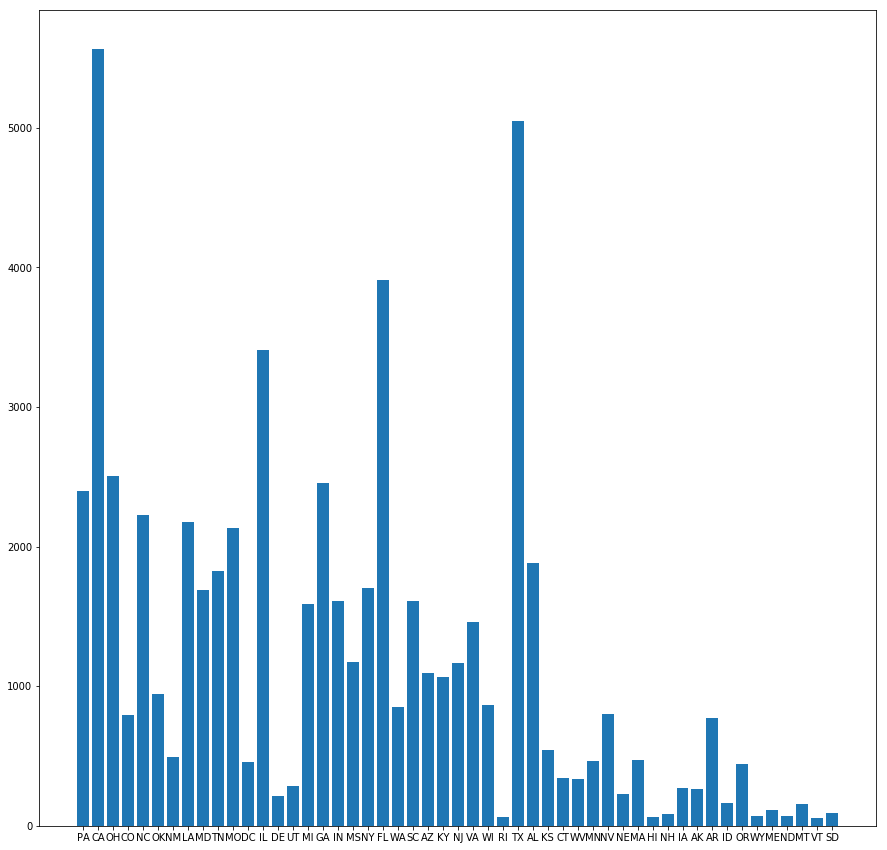

In [22]:
states = list(state_death_associations.keys())
deaths = list(state_death_associations.values())

plt.figure(figsize=(15, 15))

plt.bar(states, deaths)

### Mean of gun violence deaths?

In [37]:
# Get the total killed and total injured for each individual year.
# Graph each year in a line graph and see the increase or decrease in deaths and injured throughout the years
# This will answer: which year was the most deadliest year.
mean_deaths = df["n_killed"].sum() / len(df)
mean_deaths

0.25228953967214207

### What year had the most injured by gun violence?

In [24]:
# Get the total of deaths and injuries for each of the states
# graph the total by state on a bar graph
df_dem = df[(df["year"] <= 2016)]
total_killed_dem = df_dem.n_injured.sum()
total_killed_dem

81528

In [25]:
df_rep = df[(df["year"] >= 2017)]
total_killed_rep = df_rep.n_killed.sum()
total_killed_rep

19044

## The first two year of Presidency Dem(Obama) vs. Rep(Trump)

In [26]:
# Here we are setting up the data to make a dataframe to know in which predency period more people were killed, 
# do people die more during a dempcratic reign or republican
# NOTE: This is Obama's second term.
death = [('Democrat - Obama; Second term', total_killed_dem), ('Republican - Trump; first term', total_killed_rep)]
labels = ['Presidency', 'Number of Deaths']
presidency_death_df = pd.DataFrame.from_records(death, columns=labels)

In [27]:
presidency_death_df

,Presidency,Number of Deaths
0,Democrat - Obama; Second term,81528
1,Republican - Trump; first term,19044


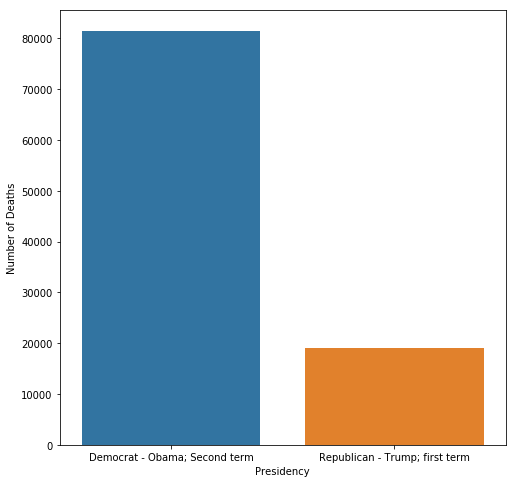

In [28]:
plt.subplots(figsize = (8,8))
sns.barplot(x=presidency_death_df['Presidency'], y=presidency_death_df['Number of Deaths'])

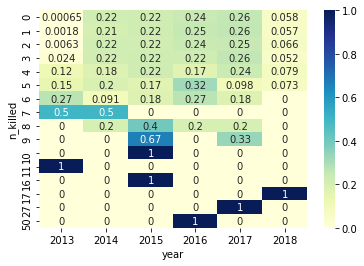

In [41]:
sns.heatmap(pd.crosstab(df['n_killed'], df['year'], normalize='index'), cmap="YlGnBu", annot=True)

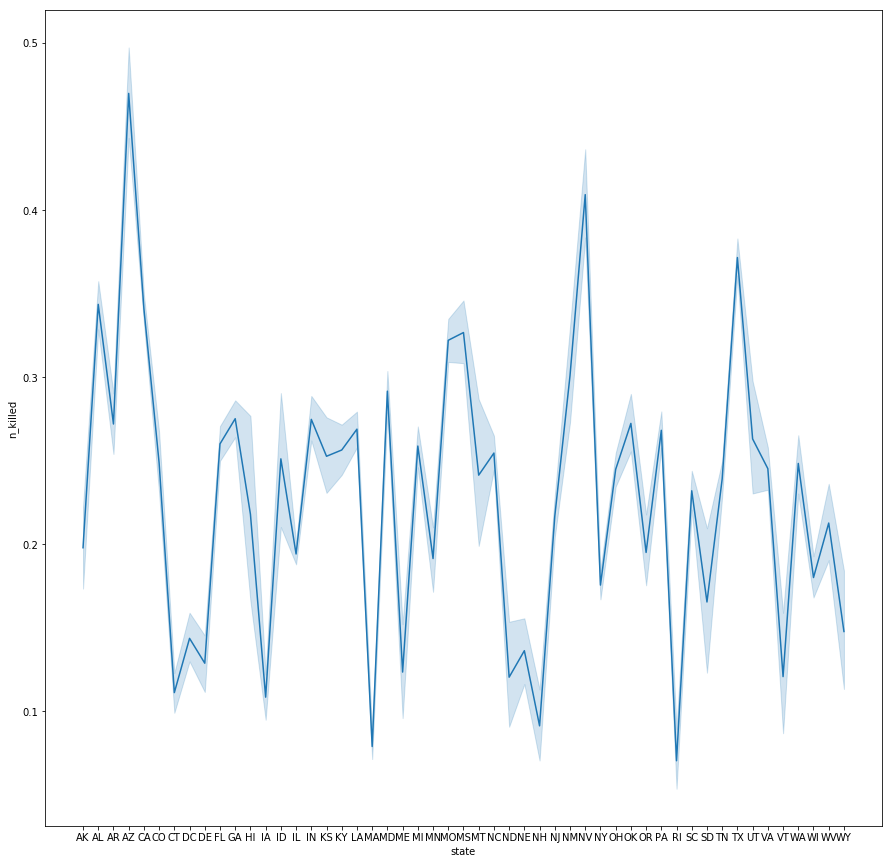

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="state", y="n_killed", markers=True, dashes=False, data=df, ax=ax)

# INTERESTING DATA TIDBITS

***

### NOTE: _Parkland Shooting Incident_

In [29]:
df[df["n_killed"] == 17]

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
232745,2018-02-14,FL,Pompano Beach (Parkland),17,17,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Institution/Group/Business||School Incident||School Shooting - elementary/secondary school||Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)",2.0,0::35||1::14||2::17||3::37||4::14||5::15||6::49||7::15||8::14||9::14||10::17||11::14||12::14||13::16||14::18||15::15||16::17||17::18||20::15||21::15||22::17||23::18||24::15||33::50||34::19,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3::Adult 18+||4::Teen 12-17||5::Teen 12-17||6::Adult 18+||7::Teen 12-17||8::Teen 12-17||9::Teen 12-17||10::Teen 12-17||11::Teen 12-17||12::Teen 12-17||13::Teen 12-17||14::Adult 18+||15::Teen 12-17||16::Teen 12-17||17::Adult 18+||18::Teen 12-17||19::Teen 12-17||20::Teen 12-17||21::Teen 12-17||22::Teen 12-17||23::Adult 18+||24::Teen 12-17||25::Teen 12-17||26::Teen 12-17||27::Teen 12-17||28::Teen 12-17||29::Teen 12-17||30::Teen 12-17||31::Teen 12-17||32::Teen 12-17||33::Adult 18+||34::Adult 18+,0::Male||1::Male||2::Male||3::Male||4::Female||5::Female||6::Male||7::Male||8::Female||9::Female||10::Male||11::Female||12::Male||13::Female||14::Female||15::Male||16::Female||17::Female||18::Male||19::Female||20::Male||21::Male||22::Female||23::Female||24::Male||25::Female||26::Female||27::Male||28::Female||29::Male||30::Female||31::Male||32::Female||33::Female||34::Male,"0::Scott Beigel||1::Martin Duque Anguiano||2::Nicholas Dworet||3::Aaron Feis||4::Jaime Guttenberg||5::Alyssa Alhadeff||6::Christopher Hixon||7::Luke Hoyer||8::Cara Loughran||9::Gina Montalto||10::Joaquin Oliver||11::Alaina Petty||12::Alexander Schachter||13::Carmen Schentrup||14::Meadow Pollack||15::Peter Wang||16::Helena Ramsay||17::Madeleine ""Maddy"" Wilford||18::Benjamin Wikander||19::Samantha Grady||20::Anthony Borges||21::Kyle Laman||22::Daniela Menescal||23::Samantha Fuentes||24::Alexander Dworet||25::Isabel Chequer||26::Ashley Baez||27::Justin Colton||28::Marian Kabachenko||29::Kheshava Managapuram||30::Samantha Mayor||31::William Olson||32::Genesis Valentin||33::Stacey Lynn Lippel||34::Nikolas Cruz",NaN,"0::Killed||1::Killed||2::Killed||3::Killed||4::Killed||5::Killed||6::Killed||7::Killed||8::Killed||9::Killed||10::Killed||11::Killed||12::Killed||13::Killed||14::Killed||15::Killed||16::Killed||17::Injured||18::Injured||19::Injured||20::Injured||21::Injured||22::Injured||23::Injured||24::Injured||25::Injured||26::Injured||27::Injured||28::Injured||29::Injured||30::Injured||31::Injured||32::Injured||33::Injured||34::Unharmed, Arrested",0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Victim||6::Victim||7::Victim||8::Victim||9::Victim||10::Victim||11::Victim||12::Victim||13::Victim||14::Victim||15::Victim||16::Victim||17::Victim||18::Victim||19::Victim||20::Victim||21::Victim||22::Victim||23::Victim||24::Victim||25::Victim||26::Victim||27::Victim||28::Victim||29::Victim||30::Victim||31::Victim||32::Victim||33::Victim||34::Subject-Suspect,2018,2,14


### NOTE: _Orlando Nightclub Shooting_

In [30]:
df[df["n_killed"] == 50]

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
130448,2016-06-12,FL,Orlando,50,53,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::9mm,"Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Institution/Group/Business||Officer Involved Incident||Officer Involved Shooting - Officer shot||Officer Involved Shooting - subject/suspect/perpetrator killed||Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Bar/club incident - in or around establishment||Hate crime||Terrorism Involvement||Kidnapping/abductions/hostage||Concealed Carry License - Perpetrator||Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)",2.0,0::34||1::23||2::20||3::22||4::36||5::22||6::22||7::37||8::30||9::29||10::32||11::21||12::25||13::35||14::50||15::25||16::33||17::37||18::26||19::35||20::25||21::31||22::26||23::25||24::30||25::40||26::32||27::19||28::21||29::37||30::39||31::33||32::25||33::24||34::31||35::25||36::25||37::24||38::27||39::33||40::49||41::24||42::32||43::28||44::27||45::41||46::29||47::18||48::25||51::26||52::27||54::30||56::25||58::25||59::20||60::20||63::32||64::26||67::27||68::30||71::29||72::37||74::19||77::19||78::30||102::29,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||8::Adult 18+||9::Adult 18+||10::Adult 18+||11::Adult 18+||12::Adult 18+||13::Adult 18+||14::Adult 18+||15::Adult 18+||16::Adult 18+||17::Adult 18+||18::Adult 18+||19::Adult 18+||20::Adult 18+||21::Adult 18+||22::Adult 18+||23::Adult 18+||24::Adult 18+||25::Adult 18+||26::Adult 18+||27::Adult 18+||28::Adult 18+||29::Adult 18+||30::Adult 18+||31::Adult 18+||32::Adult 18+||33::Adult 18+||34::Adult 18+||35::Adult 18+||36::Adult 18+||37::Adult 18+||38::Adult 18+||39::Adult 18+||40::Adult 18+||41::Adult 18+||42::Adult 18+||43::Adult 18+||44::Adult 18+||45::Adult 18+||46::Adult 18+||47::Adult 18+||48::Adult 18+||49::Adult 18+||50::Adult 18+||51::Adult 18+||52::Adult 18+||53::Adult 18+||54::Adult 18+||55::Adult 18+||56::Adult 18+||57::Adult 18+||58::Adult 18+||59::Adult 18+||60::Adult 18+||61::Adult 18+||62::Adult 18+||63::Adult 18+||64::Adult 18+||65::Adult 18+||66::Adult 18+||67::Adult 18+||68::Adult 18+||69::Adult 18+||70::Adult 18+||71::Adult 18+||72::Adult 18+||73::Adult 18+||74::Adult 18+||75::Adult 18+||76::Adult 18+||77::Adult 18+||78::Adult 18+||79::Adult 18+||80::Adult 18+||81::Adult 18+||82::Adult 18+||83::Adult 18+||84::Adult 18+||85::Adult 18+||86::Adult 18+||87::Adult 18+||88::Adult 18+||89::Adult 18+||90::Adult 18+||91::Adult 18+||92::Adult 18+||93::Adult 18+||94::Adult 18+||95::Adult 18+||96::Adult 18+||97::Adult 18+||98::Adult 18+||99::Adult 18+||100::Adult 18+||101::Adult 18+||102::Adult 18+,0::Male||1::Male||2::Male||3::Male||4::Male||5::Male||6::Male||7::Female||8::Female||9::Male||10::Female||11::Male||12::Male||13::Male||14::Male||15::Female||16::Male||17::Male||18::Female||19::Male||20::Male||21::Male||22::Male||23::Male||24::Male||25::Male||26::Male||27::Male||28::Male||29::Male||30::Male||31::Male||32::Male||33::Male||34::Male||35::Male||36::Male||37::Male||38::Female||39::Male||40::Female||41::Female||42::Male||43::Male||44::Male||45::Male||46::Male||47::Female||48::Male||49::Female||50::Male||51::Male||52::Male||53::Male||54::Male||55::Male||56::Male||57::Female||58::Male||59::Female||60::Female||61::Male||62::Male||63::Male||64::Male||65::Female||66::Male||67::Male||68::Male||69::Male||70::Male||71::Male||72::Male||73::Female||74::Female||75::Male||76::Female||102::Male,"0::Edward Sotomayor Jr||1::Stanley Almodovar III||2::Luis Omar Ocasio-Capo||3::Juan Ramon Guerrero||4::Eric I Ortiz-Rivera||5::Peter O. 

### NOTE: _Sutherland Springs Church Shooting_

In [31]:
df[df["n_killed"] == 27]

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
217151,2017-11-05,TX,Sutherland Springs,27,20,0::Unknown||1::Unknown||2::Unknown||3::Unknown,0::223 Rem [AR-15]||1::Rifle||2::9mm||3::22 LR,"Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Suicide^||Institution/Group/Business||Child Involved Incident||Child killed (not child shooter)||Child injured (not child shooter)||Defensive Use||Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator||Defensive Use - Good Samaritan/Third Party||Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Shootout (where VENN diagram of shooters and victims overlap)||Domestic Violence||Possession of gun by felon or prohibited person||Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)",4.0,0::14||1::7||2::5||3::30||4::58||5::60||6::36||7::36||8::1||9::11||10::9||11::13||12::51||13::56||14::71||15::16||16::51||17::51||18::77||19::68||20::58||21::56||22::33||23::64||24::66||25::62||26::3||28::73||29::5||34::34||38::18||46::26,0::Teen 12-17||1::Child 0-11||2::Child 0-11||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||8::Child 0-11||9::Child 0-11||10::Child 0-11||11::Teen 12-17||12::Adult 18+||13::Adult 18+||14::Adult 18+||15::Teen 12-17||16::Adult 18+||17::Adult 18+||18::Adult 18+||19::Adult 18+||20::Adult 18+||21::Adult 18+||22::Adult 18+||23::Adult 18+||24::Adult 18+||25::Adult 18+||26::Child 0-11||27::Adult 18+||28::Adult 18+||29::Child 0-11||30::Adult 18+||31::Child 0-11||32::Child 0-11||33::Adult 18+||34::Adult 18+||35::Adult 18+||36::Adult 18+||37::Adult 18+||38::Adult 18+||39::Adult 18+||40::Child 0-11||41::Child 0-11||46::Adult 18+,0::Female||1::Female||2::Female||3::Female||4::Female||5::Male||6::Female||7::Male||8::Female||9::Female||10::Female||11::Male||12::Male||13::Female||14::Female||15::Female||16::Male||17::Female||18::Male||19::Female||20::Male||21::Female||22::Female||23::Male||24::Female||25::Male||26::Male||27::Male||28::Female||29::Male||30::Male||31::Female||32::Male||33::Female||34::Male||35::Male||36::Female||37::Male||38::Male||39::Female||41::Female||46::Male,0::Annabelle Renee Pomeroy||1::Emily Garcia||2::Brooke Ward||3::Joann Ward||4::Karla Holcombe||5::Bryan Holcombe||6::Crystal Holcombe||7::Marc Daniel Holcombe||8::Noah Holcombe||9::Emily Hill||10::Megan Hill||11::Greg Hill||12::Richard Rodriguez||13::Peggy Lynn Warden||14::Lula White||15::Haley Krueger||16::Robert Corrigan||17::Shani Corrigan||18::Dennis Johnson Jr||19::Sara Johnson||20::R Scott Marshall||21::Karen Marshall||22::Tara McNulty||23::Richard Rodriguez||24::Theresa Rodriguez||25::Keith Allen Warden||27::John Holcombe||28::Farida Brown||29::Ryland Ward||30::David Colbath||31::Hailey McNulty||32::James McNulty||33::Rosa Solis||34::Kris Workman||35::Joaquin Ramirez||36::Debbie Braden||37::Bob Braden||38::Zachary Poston||39::Julie Workman||46::Devin Patrick Kelley,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4::Killed||5::Killed||6::Killed||7::Killed||8::Killed||9::Killed||10::Killed||11::Killed||12::Killed||13::Killed||14::Killed||15::Killed||16::Killed||17::Killed||18::Killed||19::Killed||20::Killed||21::Killed||22::Killed||23::Killed||24::Killed||25::Killed||26::Injured||27::Injured||28::Injured||29::Injured||30::Injured||31::Injured||32::Injured||33::Injured||34::Injured||35::Injured||36::Injured||37::Injured||38::Injured||39::Injured||40::Injured||41::Injured||42::Injured||43::Injured||44::Injured||45::Injured||46::Killed,0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Victim||6::Victim||7::Victim||8::Victim||9::Victim||10::Victim||11::Victim||12::Victim||13::Victim||14::Vi

### NOTE: _San Bernardino Shooting_

In [32]:
df[df["n_killed"] == 16]

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
101531,2015-12-02,CA,San Bernardino,16,19,0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen,0::223 Rem [AR-15]||1::223 Rem [AR-15]||2::9mm||3::9mm,"Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Institution/Group/Business||Officer Involved Incident||Officer Involved Shooting - Officer shot||Officer Involved Shooting - subject/suspect/perpetrator killed||Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Terrorism Involvement||Workplace shooting (disgruntled employee)",4.0,0::42||1::58||2::52||3::37||4::40||5::27||6::45||7::46||8::26||9::60||10::46||11::27||12::31||13::50||15::42||16::31||17::27||18::55||19::24||20::22||35::27||36::28,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||8::Adult 18+||9::Adult 18+||10::Adult 18+||11::Adult 18+||12::Adult 18+||13::Adult 18+||14::Adult 18+||15::Adult 18+||16::Adult 18+||17::Adult 18+||18::Adult 18+||19::Adult 18+||20::Adult 18+||21::Adult 18+||26::Adult 18+||27::Adult 18+||28::Adult 18+||29::Adult 18+||30::Adult 18+||31::Adult 18+||32::Adult 18+||33::Adult 18+||34::Adult 18+||35::Adult 18+||36::Adult 18+,0::Male||1::Male||3::Male||4::Male||5::Female||6::Male||7::Female||8::Female||9::Male||10::Male||11::Female||12::Female||13::Male||14::Male||15::Female||16::Female||17::Female||18::Male||19::Male||20::Female||21::Female||35::Female||36::Male,0::Larry Daniel Kaufman||1::Damian Meins||2::Nicholas Thalasinos||3::Michael Raymond Wetzel||4::Robert Adams||5::Yvette Velasco||6::Shannon Johnson||7::Bennetta Bet-Badal||8::Aurora Godoy||9::Isaac Amanios||10::Harry Bowman||11::Sierra Clayborn||12::Tin Nguyen||13::Juan Espinoza||14::Officer Nicholas Koahou||15::Anies Kondoker||16::Amanda Gaspard||17::Denise Peraza||18::Patrick Baccari||19::Kevin Ortiz||20::Jennifer Stevens||21::Julie Swann-Paez||35::Tashfeen Malik||36::Syed Rizwan Farook,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4::Killed||5::Killed||6::Killed||7::Killed||8::Killed||9::Killed||10::Killed||11::Killed||12::Killed||13::Killed||14::Injured||15::Injured||16::Injured||17::Injured||18::Injured||19::Injured||20::Injured||21::Injured||22::Injured||23::Injured||24::Injured||25::Injured||27::Injured||28::Injured||29::Injured||30::Injured||31::Injured||32::Injured||33::Injured||35::Killed||36::Killed,0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Victim||6::Victim||7::Victim||8::Victim||9::Victim||10::Victim||11::Victim||12::Victim||13::Victim||14::Victim||15::Victim||16::Victim||17::Victim||18::Victim||19::Victim||20::Victim||21::Victim||22::Victim||23::Victim||24::Victim||25::Victim||26::Victim||27::Victim||28::Victim||29::Victim||30::Victim||31::Victim||32::Victim||33::Victim||34::Victim||35::Subject-Suspect||36::Subject-Suspect,2015,12,2
